In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv('plant_disease_dataset.csv')

In [7]:
df.head()


,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [8]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


In [9]:
df.isna().sum()

temperature        0
humidity           0
rainfall           0
soil_pH            0
disease_present    0
dtype: int64

In [10]:
df.dtypes

temperature        float64
humidity           float64
rainfall           float64
soil_pH            float64
disease_present      int64
dtype: object

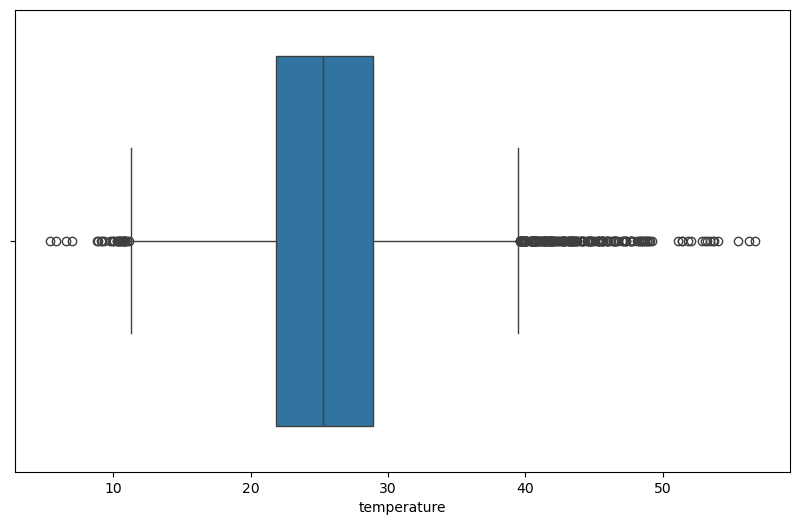

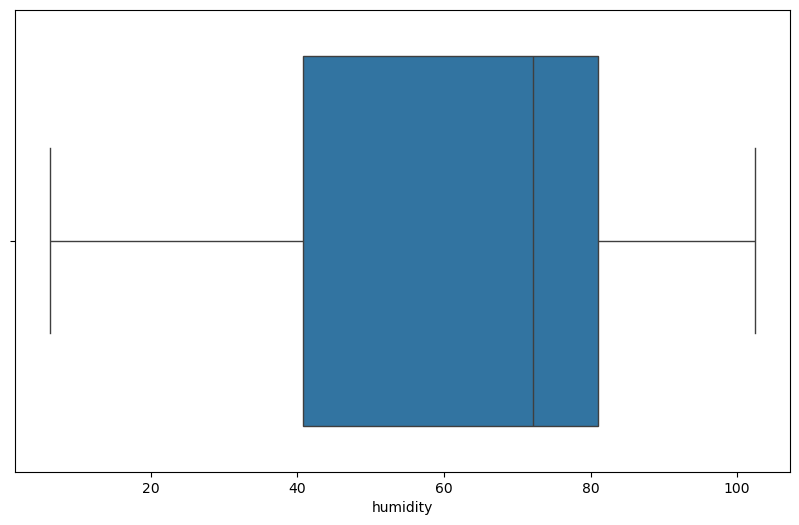

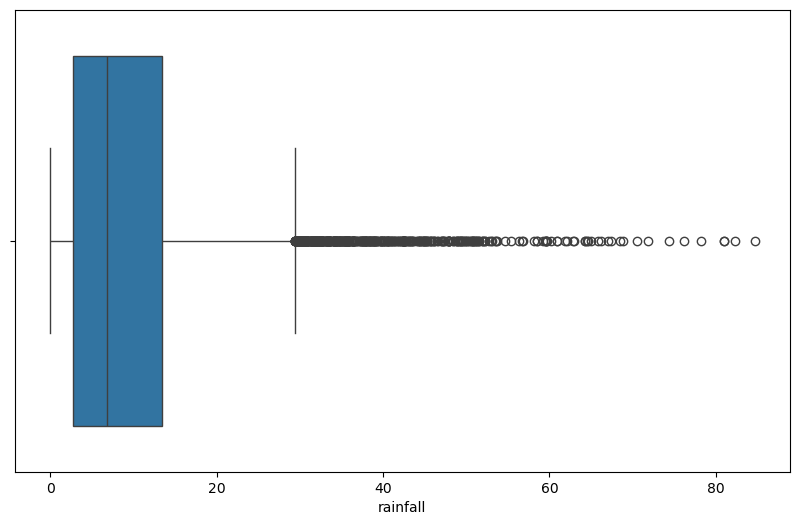

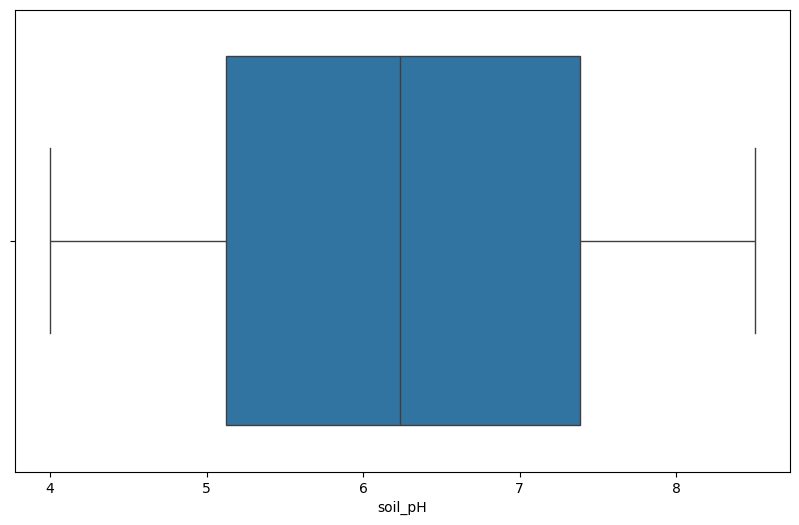

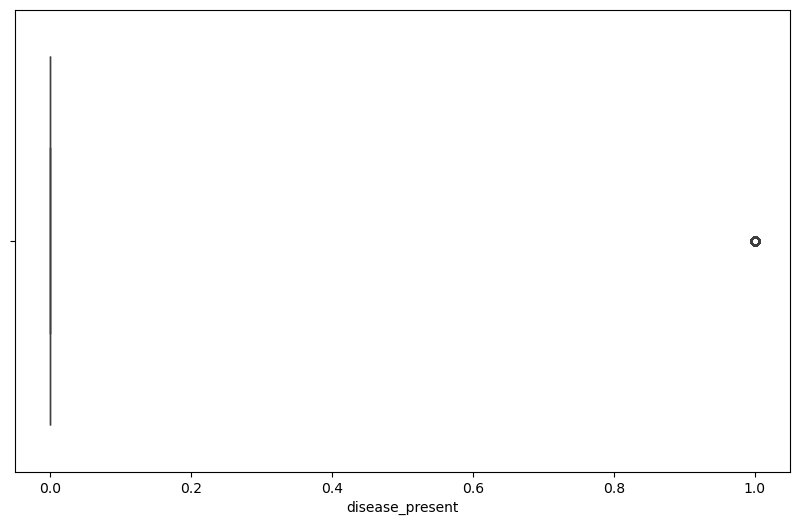

In [11]:
col = df.columns

for c in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=c, data=df)

In [12]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [13]:
df_corr = df.corr()

In [14]:
df_corr

,temperature,humidity,rainfall,soil_pH,disease_present
temperature,1.000000,-0.010136,-0.018284,-0.016792,-0.000869
humidity,-0.010136,1.000000,0.011850,0.008483,0.199241
rainfall,-0.018284,0.011850,1.000000,0.006270,0.218602
soil_pH,-0.016792,0.008483,0.006270,1.000000,-0.074088
disease_present,-0.000869,0.199241,0.218602,-0.074088,1.000000


<Axes: >

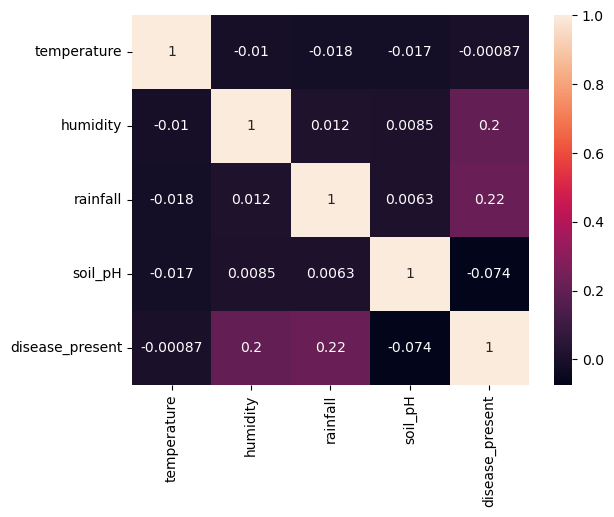

In [15]:
sns.heatmap(df_corr , annot = True)

In [16]:

X = df.drop('disease_present', axis=1)
y = df['disease_present']

In [17]:
X

,temperature,humidity,rainfall,soil_pH
0,27.483571,33.215053,0.572758,4.975875
1,24.308678,36.945005,42.522346,8.165266
2,28.238443,34.026189,16.095303,6.316734
3,32.615149,41.104180,20.311015,6.164949
4,23.829233,51.971785,11.851323,8.482468
...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952
9996,15.008275,86.886833,10.503881,4.070539
9997,21.473416,81.891770,13.426869,7.101583
9998,27.478828,88.567649,9.719659,7.732620


In [18]:
df.columns

Index(['temperature', 'humidity', 'rainfall', 'soil_pH', 'disease_present'], dtype='object')

In [19]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10)

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [22]:
X_test

,temperature,humidity,rainfall,soil_pH
6252,38.189409,81.236450,1.821797,5.189183
4684,19.814670,32.527782,8.650504,5.983636
1731,23.253416,64.457696,8.218361,4.022305
4742,25.008095,44.829299,2.177695,8.153636
4521,30.371665,41.536491,14.861256,7.288489
...,...,...,...,...
6412,15.981248,90.504936,9.894590,6.089391
8285,29.721926,78.344739,28.912290,5.509029
7853,27.706606,75.979312,13.818873,5.832750
1095,24.596417,46.165794,5.200573,7.683544


In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print('The accuracy is: ', score)

The accuracy is:  0.8485


In [26]:
import pickle
with open('plant_disease_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_accu = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# confusion_matrix(y_test, y_pred)
print(model_accu)
print(report)

0.8485
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1518
           1       0.72      0.60      0.66       482

    accuracy                           0.85      2000
   macro avg       0.80      0.76      0.78      2000
weighted avg       0.84      0.85      0.84      2000

